**Determining the level of Understanding Students have in a Class**

**Introduction:**

A student’s knowledge status can be obtained by analyzing their exam performance in relation to the method of preparation the student used. Due to the lack of adaptibility of web-based applications in education, it hinders the effectiveness and efficiency of these applications in relation to the users comprehension (Webb et al., 2001). Kahraman et al.(2008) proposes potential user modeling systems that could mitigate such barriers. A user modeling system provides customized suitable knowledge for users according to their knowledge class. Using the student’s knowledge on the data can supply insight into which attribute, during the process of preparation for an exam, is the largest contributor to the user’s knowledge class. The knowledge class of the users (UNS) was classified using an intuitive knowledge classifier, which explores the optimum weight values of students’ features on their knowledge class, and k-nearest neighbor algorithm. The dataset we will be using in this project is the User Knowledge Modeling Data Set. It contains the data of students’ knowledge status about Electrical DC machines using a total of 403 instances and five attributes: the degree of study time (STG), the degree of repetition number (SCG), the user performance in exams (PEG), the degree of study time for related objects (STR) and the learning percentage (LPR) of users for prerequisite objects (Kahraman et al., 2013). Our objective is to be able to determine a student's UNS based on the five attributes. 

**Method & Data Analysis:**

We will be using classification analysis as the main method for the project. All five of the attributes, excluding the attribute “UNS” which is the variable to be predicted, are used as predictors. The justification behind using all five of the attributes is listed below:

* Study Time (STG and STR): The longer an individual studies for, the more knowledge they are able to absorb.

* Repetition (SCG): The more times an individual studies a piece of content, the more effiectively the knowledge is retained.

* Exam Preformances (LPR and PEG): Exams are a good indicator of how effective an individual has retained and able to retrieve the knowledge.

To begin, all the necessary packages for this project are loaded and stored into R using the library function. Using the download.file function, the data set was downloaded from the University of California Irvine’s archives and stored into the “data” folder. This then allows the data to be uploaded onto R using the read_excel function.

The data set has already been wrangled, standardized, and split into both testing and training data, therefore the only thing we did was arrange the UNS by class, concluding the tidying and preprocessing stage.   

Additionally, by setting a seed, it allows the results of the KNN classification to be reproducible while being completely fair, unbiased, and not influenced by human input.

In [1]:
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(readxl)
library(repr)
library(dplyr)
library(tidyverse)

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
library(tidyverse)

# your code here
set.seed(2022)
download.file(url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", destfile = "Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls")
user_knowledge_training <- read_excel(path = "Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls",sheet ="Training_Data",range = cell_cols("A:F"))
user_knowledge_testing <- read_excel(path = "Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls",sheet ="Test_Data",range = cell_cols("A:F"))
user_knowledge_training <- user_knowledge_training %>%
    mutate(UNS = factor(UNS, levels = c('very_low','Low','Middle','High'))) %>%
    arrange(UNS)

user_knowledge_testing$UNS[which(user_knowledge_testing$UNS=='Very Low')]<-'very_low'
user_knowledge_testing <- user_knowledge_testing %>%
    mutate(UNS = factor(UNS, levels = c('very_low','Low','Middle','High'))) %>%
    arrange(UNS)
print("Table 1 : User Knowledge Training Dataset")
user_knowledge_training
print("Table 2 : User Knowledge Testing Dataset")
user_knowledge_testing


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ dplyr     1.0.2      ✔ tibble    3.0.3 
✔ ggplot2   3.3.2      ✔ tidyr     1.1.2 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 
✔ purrr     0.3.4      

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built unde

[1] "Table 1 : User Knowledge Training Dataset"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.15,0.02,0.34,0.40,0.01,very_low
0.05,0.07,0.70,0.01,0.05,very_low
⋮,⋮,⋮,⋮,⋮,⋮
0.61,0.78,0.69,0.92,0.58,High
0.54,0.82,0.71,0.29,0.77,High
0.66,0.90,0.76,0.87,0.74,High


[1] "Table 2 : User Knowledge Testing Dataset"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.16,0.25,0.01,0.10,0.07,very_low
0.18,0.26,0.05,0.40,0.04,very_low
⋮,⋮,⋮,⋮,⋮,⋮
0.78,0.47,0.29,0.98,0.59,High
0.90,0.78,0.62,0.32,0.89,High
0.85,0.82,0.66,0.83,0.83,High


Let's take a look our dataset first. We can see STG,SCG,STR,LPR,PEG,UNS are five numerical veriables and UNS is a categorical verable.In order to get more information about this variable, we created a bar chart to help visualize the distribution of the UNS.

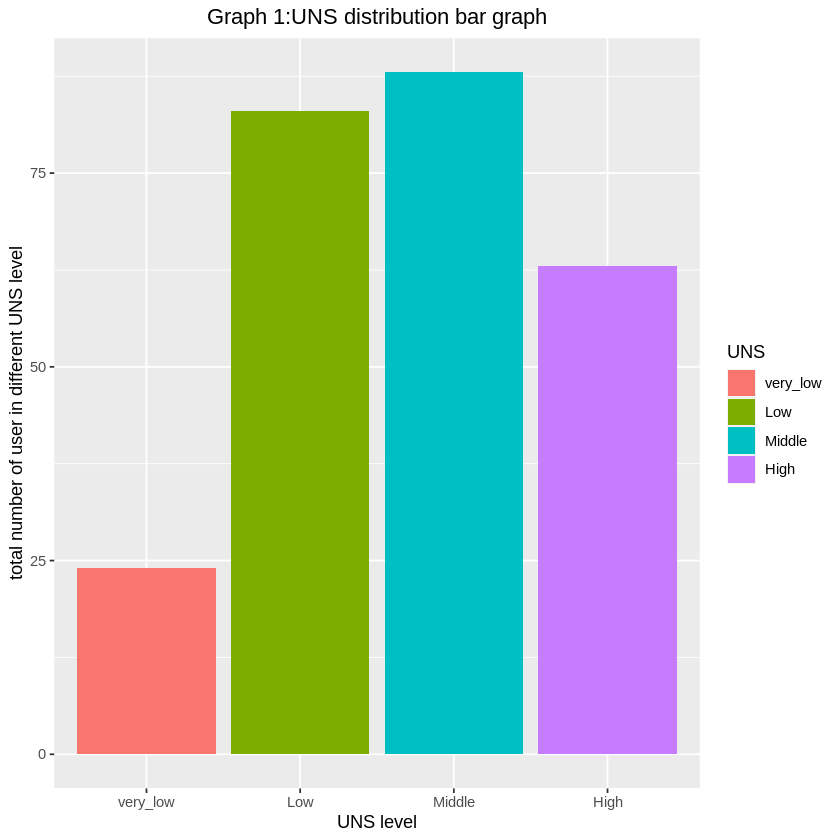

In [60]:
count_uns <- user_knowledge_training %>%
    group_by(UNS) %>%
    count(UNS)

count_bar_chart <- ggplot(count_uns, aes(x = UNS, y = n, fill= UNS)) + 
    geom_bar(stat = "identity") +
    ggtitle("Graph 1:UNS distribution bar graph") +
    xlab("UNS level") +
    ylab("total number of user in different UNS level") +
    theme(plot.title = element_text(hjust = 0.5)) 
count_bar_chart

From the graph above, it is clear that the level of UNS is quite normally distributed. Suggesting that the middle UNS has the largest distribution, while there is relatively lower distribution in the lower and upper ends.

In order to select the best $K$ value used during the KNN classification, the training data set has be tuned by undergoing a 5-fold cross-validation and parameter value selection.

The vfold_cv function splits the training data into 5 different folds that contains the fair proportions respective to the UNS. 

The nearest_neighbor function is then used to create a new model specifications for the KNN classification. By specifying the weight function to be rectangular, each of the KNN gets 1 vote when classifying the new observation. As for the $K$ value, we replaced it with tune (), which is necessary when identifying the best $K$ value. It should also be noted that the engine was set to "kknn" which is the weighted K-nearest neighbor algorithm, and the mode was set to "classification".

We then created a data analysis workflow (knn_results), adding the recipe and the KNN classifcation model, while running cross-validation on each split. The tune_grid function fits the model (knn_tune) within a range of parameter values. Additionally, the collect_metrics function calculates the mean and standard error of the classifier’s validation accuracy across the folds.

A line graph is then plotted to help us observe the relationship between the $K$ value and the accuracy of the estimates, this will help determine which $K$ value is the best fit. 


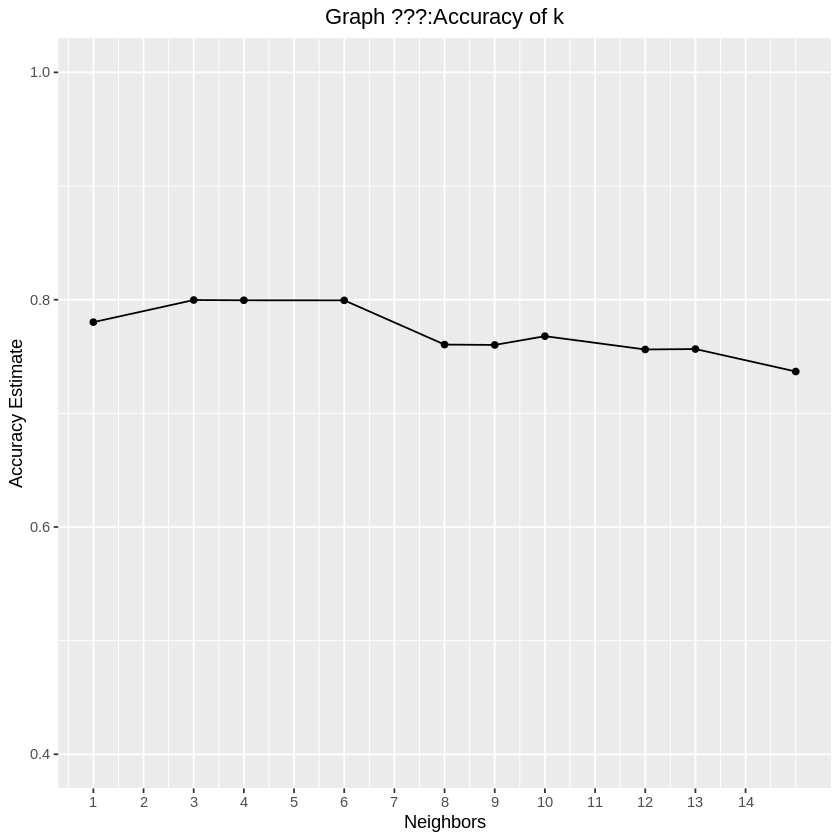

In [11]:
set.seed(2022)
user_knowledge_vfold<- vfold_cv(user_knowledge_training, v = 5, strata = UNS)

user_knowledge_recipe <- recipe(UNS ~ STG + SCG + STR + LPR + PEG , data = user_knowledge_training) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) %>%
      set_engine("kknn") %>%
      set_mode("classification")

user_knowledge_resample_fit <- workflow() %>%
      add_recipe(user_knowledge_recipe) %>%
      add_model(knn_spec) %>%
      fit_resamples(resamples = user_knowledge_vfold)

user_knowledge_metrics <- user_knowledge_resample_fit %>%
            collect_metrics()

knn_tune <- nearest_neighbor(weight_func = "rectangular",neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

knn_results <- workflow() %>%
    add_recipe(user_knowledge_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = user_knowledge_vfold, grid = 10) %>%
     collect_metrics()

accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis
      ggtitle("Graph 2:Accuracy of k") +
      theme(plot.title = element_text(hjust = 0.5)) 
accuracy_versus_k


From the graph above, we decided that $K = 3$ is the best K value to use while performing the KNN classification for this data set. This is because, any $K$ value between 3-6 is very similar, hovering slightly above or below the 80% range. Therefore, we decided to go with the lowest $K$ value to keep the cost relatively lower. 

We then were able to recreate the KNN classification with $K=3$ from the training dataset, and then predicting the UNS in the testing dataset. A confusion matrix of the prediction was then created to help evaluate the accuracy of the classifer.

In [9]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
      set_engine("kknn") %>%
      set_mode("classification")

user_knowledge_fit <- workflow() %>%
      add_recipe(user_knowledge_recipe) %>%
      add_model(knn_spec) %>%
      fit(data = user_knowledge_training)

user_knowledge_test_predictions <- predict(user_knowledge_fit , user_knowledge_testing) %>%
      bind_cols(user_knowledge_testing)
print("Table 3 : Prediction of User Knowledge Testing Dataset")
user_knowledge_test_predictions

user_knowledge_prediction_accuracy <- user_knowledge_test_predictions %>%
        metrics(truth = UNS, estimate = .pred_class) 
print("Table 4 : Prediction Accuracy")
user_knowledge_prediction_accuracy

user_knowledge_mat <- user_knowledge_test_predictions %>% 
      conf_mat(truth = UNS, estimate = .pred_class)
print("Table 5 : Confusion Matrix of UNS")
user_knowledge_mat

[1] "Table 3 : Prediction of User Knowledge Testing Dataset"


.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
very_low,0.00,0.10,0.50,0.26,0.05,very_low
Low,0.16,0.25,0.01,0.10,0.07,very_low
very_low,0.18,0.26,0.05,0.40,0.04,very_low
⋮,⋮,⋮,⋮,⋮,⋮,⋮
High,0.78,0.47,0.29,0.98,0.59,High
Middle,0.90,0.78,0.62,0.32,0.89,High
High,0.85,0.82,0.66,0.83,0.83,High


[1] "Table 4 : Prediction Accuracy"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8206897
kap,multiclass,0.7545253


[1] "Table 5 : Confusion Matrix of UNS"


          Truth
Prediction very_low Low Middle High
  very_low       15   3      0    0
  Low            11  41      6    0
  Middle          0   2     27    3
  High            0   0      1   36

From table 4 we can see our Prediction Accuracy is around 82%. Since the knowledge level of the user  , we can 

We also want to see if there is any relationships between the predictors and the UNS.Since ggpairs is too small to see the relationships, we create ggplot between each of the variable with our target value(UNS).

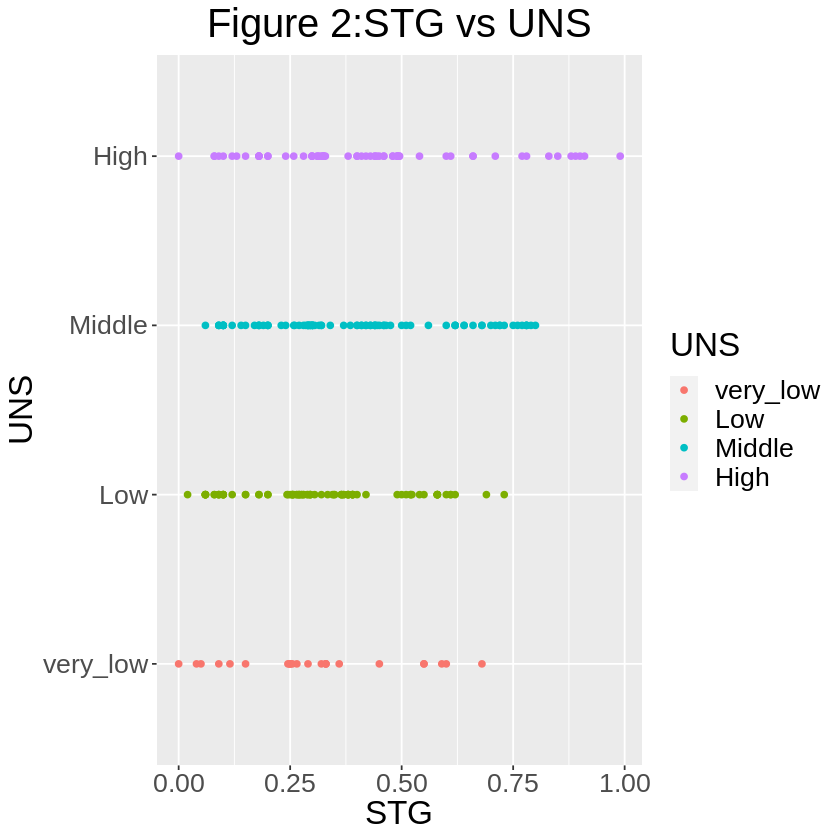

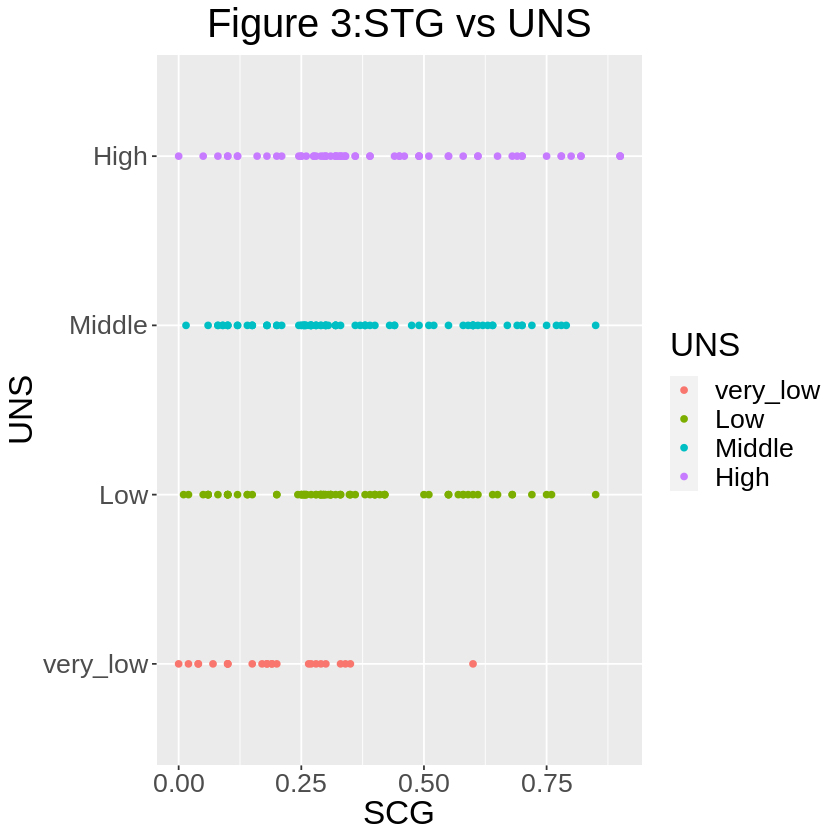

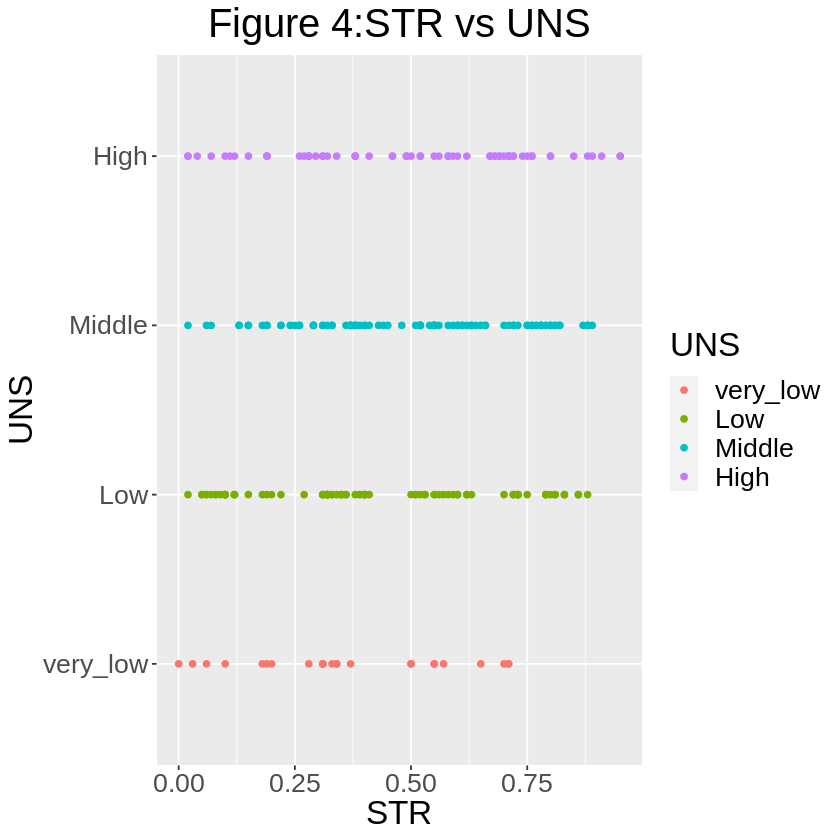

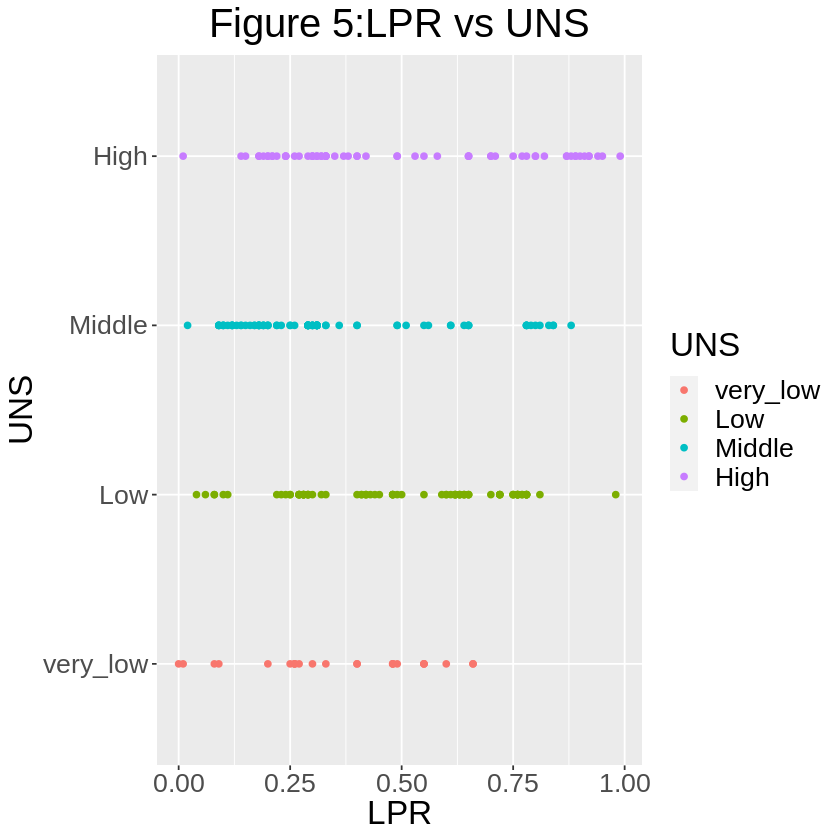

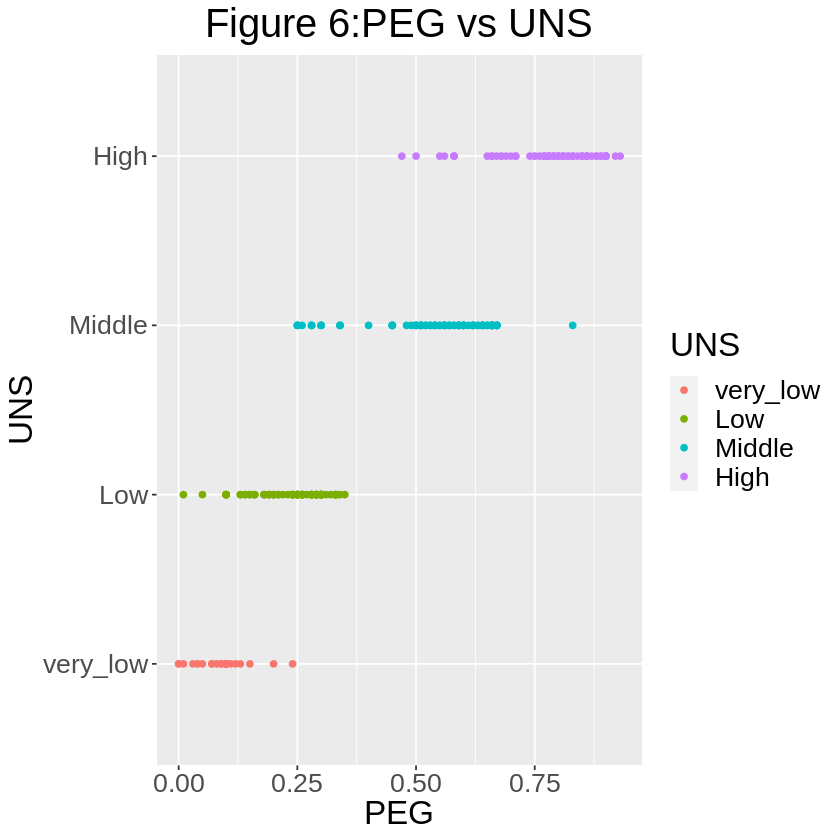

In [59]:
STG <- ggplot(user_knowledge_training, aes(x = STG, y = UNS, colour = UNS)) +
    geom_point()  +
    ggtitle("Figure 3:STG vs UNS") +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(text = element_text(size = 20))
STG

SCG <- ggplot(user_knowledge_training, aes(x = SCG, y = UNS ,colour = UNS)) +
    geom_point() + 
    ggtitle("Figure 4:STG vs UNS") +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(text = element_text(size = 20))
SCG

STR <- ggplot(user_knowledge_training, aes(x = STR, y = UNS ,colour = UNS)) +
    geom_point() +
    ggtitle("Figure 5:STR vs UNS") +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(text = element_text(size = 20))
STR

LPR <- ggplot(user_knowledge_training, aes(x = LPR, y = UNS ,colour = UNS)) +
    geom_point()  +
    ggtitle("Figure 6:LPR vs UNS") +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(text = element_text(size = 20))
LPR

PEG <- ggplot(user_knowledge_training, aes(x = PEG, y = UNS ,colour = UNS)) +
    geom_point()  +
    ggtitle("Figure 7:PEG vs UNS") +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(text = element_text(size = 20))
PEG

From the scatterplots above, we can see that variables: STG, SCG, STR, LPR have a random distribution of UNS value at different levels. Only the PEG plot shows an organized distribution at different levels. Therefore, we know that only PEG has a strong linear relationship with UNS. Also it should be noted that in the Very Low level of UNS, most of PEG are around 0 to 0.125. In the Low level of UNS, most of PEG are around 0.125 to 0.375. In the Middle level of UNS, most of PEG are around 0.5 to 0.65. In the High level of UNS, most of PEG are around 0.6 to 0.9. This means that this four parts of the UNS are subgroups and they are quite indenpendent. This means that PEG could be a great predictor variable for our futher classification model.

**Discussion:**

If we consider the UNS level Middle or High to be a great result, we can establish the relationship for all the attributes such that UNS level is either Middle or High.

**STG** ->
As the STG levels rise, we observe that the UNS levels Low and Very Low decrease and stop appearing after a point. Hence there is a weak positive linear relationship between UNS and STG.

**SCG** ->
As the SCG levels rise, we observe that Very Low UNS level disappears. But since Low and Middle UNS levels have an even spreadout, this attribute is not suitable for determining a student's UNS level.

**STR** ->
As the STR levels rise, we observe a subtle rise in UNS levels. The relation between UNS levels and STR is medium positive linear relationship.

**LPR** ->
The graph for UNS vs LPR should look like an upward open parabola with its extreme ends having UNS values of High and Middle and the middle section of the parabola would have UNS values Low and Very Low.

**PEG** ->
The relation between UNS and PEG is a strong positive linear relationship. This attribute is the most ideal choice for determining a student's UNS level.

**Expected Outcomes and Impact:** From the above analysis of the relationships of the five attributes against UNS level of students, we can conclude that the best attribute to determining the UNS level is PEG (The exam performance of user for goal objects). However since this is exam performance, this attribute can't help a student in preparing for an exam, so we choose the next best attribute. STR (The degree of study time of user for related objects with goal object) has a medium positive relationship against UNS. Hence, in order for a student to perform well in exam, they need a high UNS level (concluded from UNS vs PEG relationship). If a student has a high STR, they are likely to have a high UNS and therefore a great exam performance.

**Future Questions:**
</br>
1. Are there any other attributes outside the ones mentioned in this study that have a better relationship against student UNS level?
</br>
2. Which of the five attributes have the most dominant affect UNS levels?

**References:**

Kahraman, H. T., Sagiroglu, S., Colak, I. A User Modeling Approach to Web Based Adaptive Educational Hypermedia Systems, Seventh International Conference on Machine Learning and Applications, pp. 694-699, 2008.

Kahraman, H. T. Designing and Application of Web-Based Adaptive Intelligent Education System. Gazi University Ph. D. Thesis,pp. 1-156, 2009.

Kahraman, H. T., Sagiroglu, S., Colak, I. The development of intuitive knowledge classifier and the modeling of domain dependent data, Knowledge-Based Systems, Volume 37, pp. 283-295, 2013.

Tsiriga, V., Virvou, M. A Framework for the Initialization of Student Models in Web-based Intelligent Tutoring Systems. User Modeling and User-Adapted Interaction 14, pp. 289–316, 2004.

Webb, G.I., Pazzani, M.J., Billsus, D. Machine Learning for User Modeling. User Modeling and User-Adapted Interaction 11, pp. 19–29, 2001.

**Group Members:**


Geng Chen(51264893), Brendan Cheng(54085402), Ankur Bhardwaj(83640458), Janice Lee(60983079)